# A Look at the TCGA RNA-seq Dataset

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from __future__ import print_function

from IPython.display import display
from IPython.display import clear_output

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
df = pd.read_table('unaligned.tsv', sep='\t')

In [5]:
df = df[['barcode', 'analysis_id', 'disease_name', 'center', 'files_size']]
df['files_size'] = df['files_size'] / 1024.0 / 1024 / 1024
df.rename(columns = {'files_size':'size_GB'}, inplace=True)

In [6]:
df.head()

,barcode,analysis_id,disease_name,center,size_GB
0,TCGA-DQ-5630-01A-01R-1873-07,5557a728-1827-4aff-b28b-f004d835f9d6,Head and Neck squamous cell carcinoma,UNC-LCCC,5.353189
1,TCGA-KK-A7B0-01A-11R-A32O-07,2826301c-5d33-465a-99fa-401aea553a7f,Prostate adenocarcinoma,UNC-LCCC,5.292468
2,TCGA-DD-A3A3-11A-11R-A22L-07,bb9ecd73-ded7-4c4e-9674-d05647be7a22,Liver hepatocellular carcinoma,UNC-LCCC,4.354037
3,TCGA-VV-A829-01A-21R-A36H-07,f23c04eb-6f22-4b19-a6e3-90e7887f535e,Brain Lower Grade Glioma,UNC-LCCC,5.456621
4,TCGA-56-7222-01A-11R-2045-07,8aef55bf-eeca-40ac-9025-fff4fbcf1c24,Lung squamous cell carcinoma,UNC-LCCC,6.211421


In [112]:
print('Number of samples: %i' % len(df))
print('Min: %.2fGB' % min(df['size_GB']))
print('Max: %.2fGB' % max(df['size_GB']))
print('Avg: %.2fGB' % np.mean(df['size_GB']))
print('Total: %.2fGB or %.2fTB' % (sum(df['size_GB']), sum(df['size_GB'] / 1024)))

Number of samples: 11194
Min: 0.27GB
Max: 27.69GB
Avg: 6.18GB
Total: 69228.23GB or 67.61TB


<h5 align="center">Boxplot Reminder</h5> 

<img src="boxplot.png", style="width: 500px">

(0, 20)

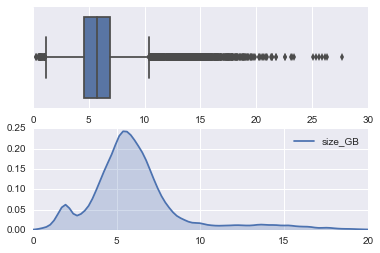

In [72]:
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df['size_GB'], ax=ax1)
sns.kdeplot(df['size_GB'], ax=ax2, shade=True)
plt.xlim([0,20])

Click the button below to see a random sample of file sizes from the unaligned TCGA cohort

Now that I've wasted 10 minutes making that button, let's ensure that none of our unique samples (identified via barcode) have more than one analysis id.

In [6]:
df = pd.read_table('TARGET.tsv', sep='\t')

In [7]:
df = df[['barcode', 'analysis_id', 'disease_name', 'center', 'files_size']]
df['files_size'] = df['files_size'] / 1024.0 / 1024 / 1024
df.rename(columns = {'files_size':'size_GB'}, inplace=True)

In [8]:
df.head()

,barcode,analysis_id,disease_name,center,size_GB
0,TARGET-50-PAJNZK-01A-01R,093568f4-7f51-4289-895f-965f91c8c4d1,Wilms Tumor,BCCAGSC,11.099463
1,TARGET-10-PANRDC-03A-01R,5ebf7ad7-aa54-4752-ad5b-1b7baeb792ac,Acute Lymphoblastic Leukemia,BCCAGSC,20.069399
2,TARGET-10-PANJWJ-09A-01R,96197e88-0780-47b0-87cf-2533fdeba4cd,Acute Lymphoblastic Leukemia,BCCAGSC,11.790533
3,TARGET-50-PAJLSP-01A-01R,7b593942-e280-48fe-9bc1-862d12e07830,Wilms Tumor,BCCAGSC,10.092211
4,TARGET-10-PAPBSY-09A-01R,06ba4196-6b1a-473a-b363-69f109c9fe5d,Acute Lymphoblastic Leukemia,BCCAGSC,11.057110


In [9]:
with open('TARGET_IDs.txt', 'w') as f:
    for id in df.analysis_id:
        f.write(id + '\n')

In [10]:
sum(df.size_GB)

9606.2495613098145

(0, 20)

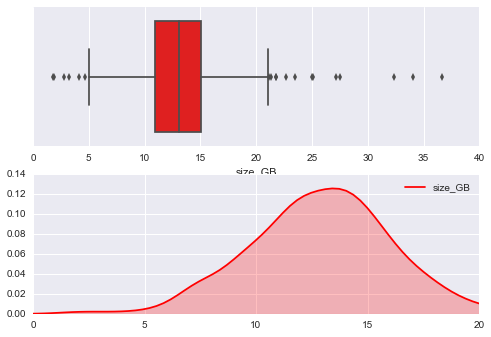

In [12]:
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df['size_GB'], ax=ax1, color='r')
sns.kdeplot(df['size_GB'], ax=ax2, shade=True, color='r')
plt.xlim([0,20])